# Домашнее задание по статистическому анализу на python

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr
import seaborn as sns
from sklearn import preprocessing

Загрузить датасет по url:


In [4]:
df=pd.read_csv('world-happiness-report-2019.csv')

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [5]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?
- Равномерное распределение

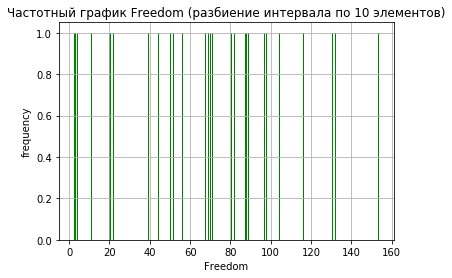

In [30]:
n, bins, patches = plt.hist(df[['Freedom']], 10, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

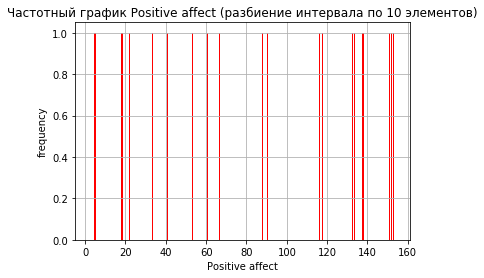

In [28]:
n, bins, patches = plt.hist(df[['Positive affect']], 10, facecolor='r')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [74]:
#очищаю от nan для статистики
freedom = df.Freedom[~df.Freedom.isnull()]


print('Медиана: ', statistics.median(freedom))
try:
    print('Значение моды: ', statistics.mode(freedom))
except:
    print('Нет моды')
    
print('Математическое ожидание: ', statistics.mean(freedom))
print('Стандартное отклонение: ', statistics.pstdev(freedom))
print('Дисперсия: ', statistics.pvariance(freedom))
print('Минимум: ', min(freedom))
print('Максимум: ', max(freedom))
print('Размах: ',  max(freedom) - min(freedom))
print('Выбросы: ', freedom.isnull().sum())

Медиана:  78.0
Нет моды
Математическое ожидание:  78.0
Стандартное отклонение:  44.74371464239419
Дисперсия:  2002.0
Минимум:  1.0
Максимум:  155.0
Размах:  154.0
Выбросы:  0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент 0.68 говорит, что определенная зависимость в данных есть

Коэффициент корреляции Пирсона: 0.6817698430601656


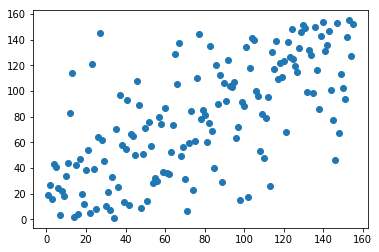

In [82]:
positive_affect = df['Positive affect'][~df.Freedom.isnull()]

corr, p_value = pearsonr(freedom, positive_affect)

print('Коэффициент корреляции Пирсона:', corr)

plt.scatter(freedom,positive_affect)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [92]:
print("Центрирование: - ", statistics.mean(freedom))
freedom_1 = freedom - statistics.mean(freedom)
print("Нормализация: - ",statistics.mean(freedom_1))

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

Центрирование: -  78.0
Нормализация: -  0.0
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

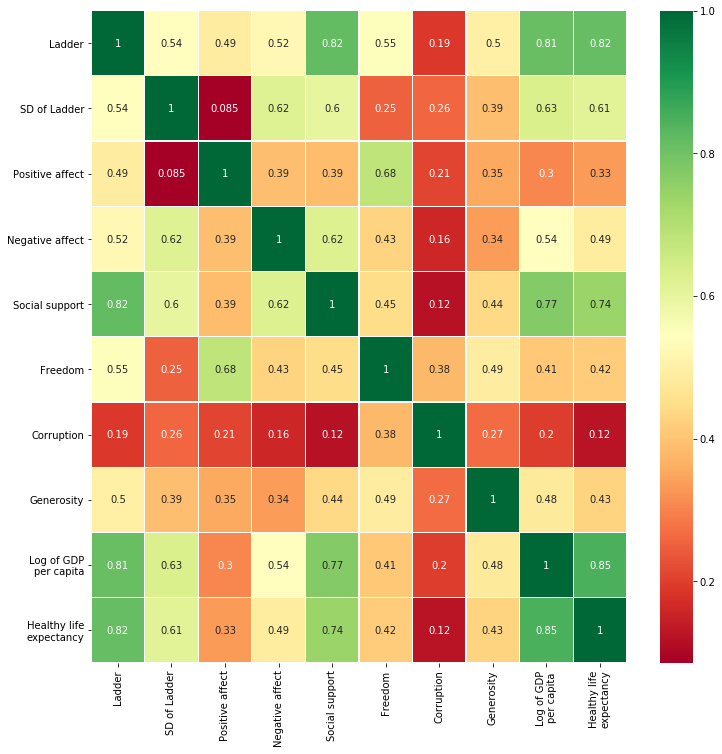

In [86]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [93]:
import io
import requests
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?
- Гамма распределение

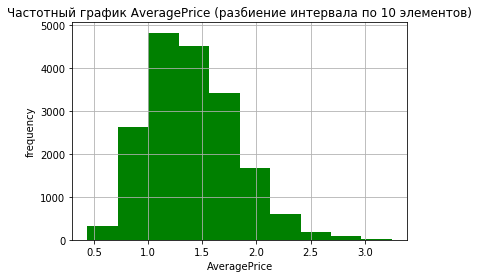

In [101]:
n, bins, patches = plt.hist(df.AveragePrice, 10, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.
- корреляция -0.21, больше похоже, что данные независимы

In [104]:
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])

print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.20831704848788477
